# combine output files

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import numpy as np;
import pandas as pd;
import os;
import matplotlib.pyplot as plt;
import matplotlib as mpl
import string
import plotly.graph_objects as go
from textwrap import wrap
import pickle
import glob
import os, sys
from pandas import *

import regression
from regression import *

from os.path import dirname

parent_dir = (dirname(os.getcwd()))

In [6]:
xls = ExcelFile('soils.xlsx')
soil = xls.parse(xls.sheet_names[0])

In [9]:
#combines csv files into a single csv file, adds file name to new column "Source"
core=combine(soil)
with open('out/SCSTYPEI_MGA/CORE_ALL.pickle', 'wb') as handle:
    pickle.dump(core, handle, protocol=pickle.HIGHEST_PROTOCOL)
core = pd.DataFrame(core)
core=bins(core)

out/SCSTYPEI_MGA_SAT
out/SCSTYPEI_MGA_FC
out/SCSTYPEI_MGA_WP


#  sensitivity box plots

In [10]:
#binning continuous data
core

,W_m,L:W,W,W_norm,A_hec,fV,S,P_cm,f_var,Ks_mm,SoilConditions,soil,H_i_cm,fV_bins,a_bins,w_bins
0,0.925395,148.615712,3.036074,-0.077534,0.012727,0.874911,1.0,1.5,0.949,0.3,SAT,Clay,32.0,0.9,0.1,0.82
1,0.925395,148.615712,3.036074,-0.077534,0.012727,0.874911,2.0,1.5,0.955,0.3,SAT,Clay,32.0,0.9,0.1,0.82
2,0.925395,148.615712,3.036074,-0.077534,0.012727,0.874911,3.0,1.5,0.959,0.3,SAT,Clay,32.0,0.9,0.1,0.82
3,0.925395,148.615712,3.036074,-0.077534,0.012727,0.874911,4.0,1.5,0.961,0.3,SAT,Clay,32.0,0.9,0.1,0.82
4,1.966610,23.344058,6.452131,0.676311,0.009028,0.170273,1.0,1.5,0.994,0.3,SAT,Clay,32.0,0.2,0.1,0.82
5,1.966610,23.344058,6.452131,0.676311,0.009028,0.170273,2.0,1.5,0.995,0.3,SAT,Clay,32.0,0.2,0.1,0.82
6,1.966610,23.344058,6.452131,0.676311,0.009028,0.170273,3.0,1.5,0.995,0.3,SAT,Clay,32.0,0.2,0.1,0.82
7,1.966610,23.344058,6.452131,0.676311,0.009028,0.170273,4.0,1.5,0.996,0.3,SAT,Clay,32.0,0.2,0.1,0.82
8,3.865878,29.798463,12.683327,1.352189,0.044534,0.625597,1.0,1.5,0.965,0.3,SAT,Clay,32.0,0.7,0.1,1.72
9,3.865878,29.798463,12.683327,1.352189,0.044534,0.625597,2.0,1.5,0.971,0.3,SAT,Clay,32.0,0.7,0.1,1.72


In [11]:
cols=['soil','fV_bins','a_bins','SoilConditions','P_cm','w_bins','S']
feature_labels=['Soil Texture','$ɸ_P$','$A$','$ASM$','$P$','$W$','$S$']

min_t=dict()
max_t=dict()
std_t=dict()

for i,c in enumerate(cols):
    print(i,c)
    max_tab={}
    min_tab={}
    tab=core[['f_var',c]]
    ma = tab.groupby([c]).median()
    max_tab=ma['f_var'].max()
    min_tab=ma['f_var'].min()
    std=ma['f_var'].std()
    # Adding a new key value pair
    min_t.update( {feature_labels[i] : min_tab} )
    max_t.update( {feature_labels[i] : max_tab} )
    std_t.update( {feature_labels[i] : std} )
    
min_table=pd.DataFrame.from_dict(min_t, orient='index').rename(columns={0: "min \n%s" % "\n".join(wrap("$ɸ_{var}$"))})
max_table=pd.DataFrame.from_dict(max_t, orient='index').rename(columns={0: "max \n%s" % "\n".join(wrap("$ɸ_{var}$"))})
std_table=pd.DataFrame.from_dict(std_t, orient='index').rename(columns={0: "std dev \n%s" % "\n".join(wrap("$ɸ_{var}$"))})
frames=[min_table,max_table,std_table]
min_max=pd.concat(frames,axis=1).astype(float).round(2)
min_max=min_max.reset_index().rename(columns={'index': "parameter"})
std_table=std_table.astype(float).round(2)
std_table=std_table.reset_index().rename(columns={'index': "parameter"})
std_table

0 soil
1 fV_bins
2 a_bins
3 SoilConditions
4 P_cm
5 w_bins
6 S


,parameter,std dev $ɸ_{var}$
0,Soil Texture,0.39
1,$ɸ_P$,0.22
2,$A$,0.10
3,$ASM$,0.18
4,$P$,0.33
5,$W$,0.09
6,$S$,0.00


In [12]:
from textwrap import wrap
core['soil_wrap']=[ '\n'.join(wrap(l, 10)) for l in core['soil'] ]
core['soil'].unique()

array(['Clay', 'Silty Clay', 'Sandy Clay', 'Silty Clay Loam',
       'Sandy Clay Loam', 'Loam', 'Silt Loam', 'Sandy Loam', 'Loamy Sand',
       'Sand'], dtype=object)

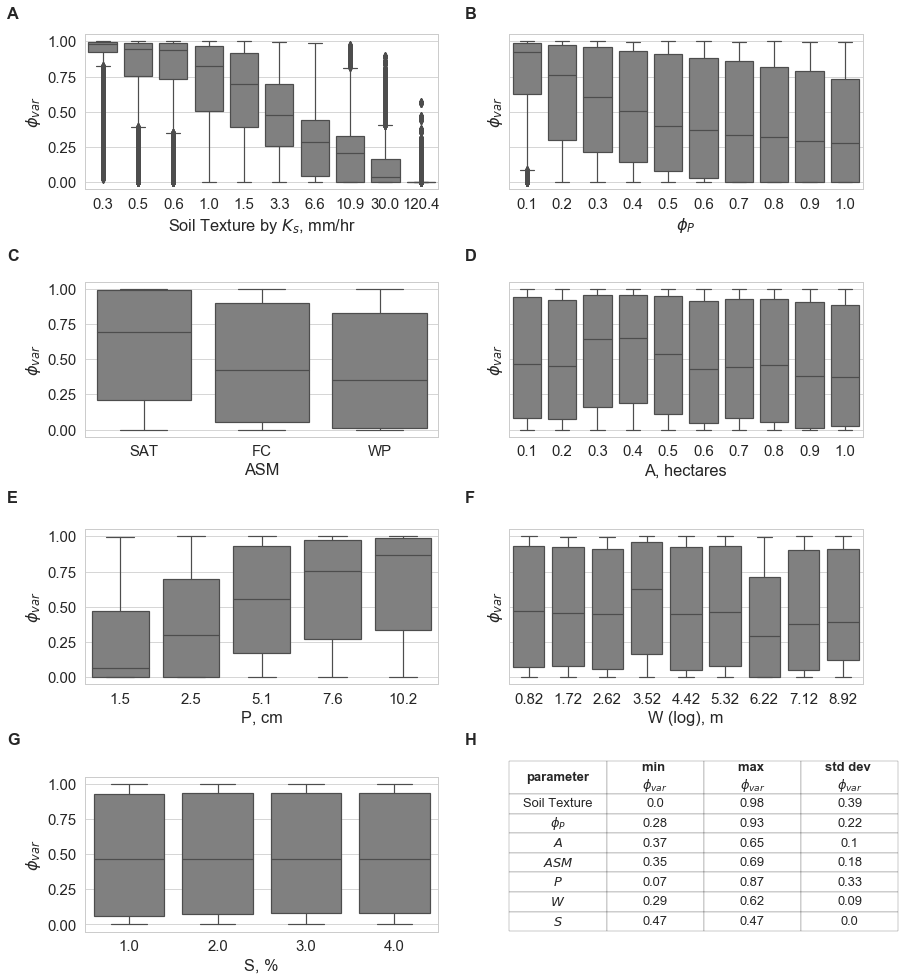

In [14]:
from textwrap import wrap
core['soil_wrap']=[ '\n'.join(wrap(l, 20)) for l in core['soil'] ]


#box plots of Ks, initial soil moisture, P, S
from matplotlib.font_manager import FontProperties

#title="Connectivity across range of pervious fractions \n%s" % "\n".join(wrap("($P$ = 4 inches, $S$ = 1%, saturated soils)",width=60))


def boxplots(x,y):
    n=x*y
    'n is number of subplots'
    f, axes = plt.subplots(x,y,sharey=True,figsize= (12,14))
    sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
    f.subplots_adjust(left=0.09, bottom=0.1, right=0.99, top=0.99, wspace=0.2)
    f.subplots_adjust(hspace = 0.6)
    sns.set_context("paper", font_scale=1.7) 
    
    labels=list(string.ascii_uppercase)
    n_list=list(range(n))
    ab = zip(labels, n_list)
    for i,(a,b) in enumerate(ab):
        if (i % 2) == 0:
            f.text(0.0, 1.01*(n-0.95*i)/n, a, weight="bold", horizontalalignment='left', verticalalignment='center')
        else:
            f.text(0.53, 1.01*(n-0.95*i)/n+0.12, a, weight="bold", horizontalalignment='left', verticalalignment='center')

    return f, axes,ab

f, axes,ab=boxplots(4,2)

sns.boxplot(x ='Ks_mm', y='f_var', data=core, color='grey',ax=axes[0][0]).set(xlabel='Soil Texture by $K_s$, mm/hr',ylabel='$ɸ_{var}$')     
sns.boxplot(x ='SoilConditions', y='f_var', data=core, color='grey',ax=axes[1][0]).set(xlabel='ASM',ylabel='$ɸ_{var}$') 
sns.boxplot(x ='P_cm', y= 'f_var', data=core,color='grey',ax=axes[2][0]).set(xlabel='P, cm',ylabel='$ɸ_{var}$') 
sns.boxplot(x ='S', y= 'f_var', data=core,color='grey',ax=axes[3][0]).set(xlabel='S, %',ylabel='$ɸ_{var}$') 
sns.boxplot(x ='fV_bins', y='f_var', data=core, color='grey',ax=axes[0][1]).set(xlabel='$ɸ_P$',ylabel='$ɸ_{var}$')  
sns.boxplot(x ='a_bins', y='f_var', data=core, color='grey',ax=axes[1][1]).set(xlabel='A, hectares',ylabel='$ɸ_{var}$') 
sns.boxplot(x ='w_bins', y='f_var', data=core, color='grey',ax=axes[2][1]).set(xlabel='W (log), m',ylabel='$ɸ_{var}$')
axes[3, 1].axis('off')


table=plt.table(cellText=min_max.values,
          colLabels=min_max.columns, 
          cellLoc = 'center', rowLoc = 'center', bbox=[0.001,.001,1.1,1.1])
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

colLabels=min_max.columns
tab = [[5,2], [4,1], [4,1],[4,1], [4, 1],[4,1],[4,1]]

cellDict = table.get_celld()
for i in range(0,len(colLabels)):
    cellDict[(0,i)].set_height(1.5)
    for j in range(1,len(tab)+1):
        cellDict[(j,i)].set_height(0.9)
for key, cell in table.get_celld().items():
    cell.set_linewidth(0.2)
    cell.set_edgecolor('black')
    cell.set_fontsize(14)
axes[3][1].table
plt.savefig('sensitive.png')